# Project: Investigate GAPMINDER WORLD

# Table of Contents
> Introduction

> Data Wrangling And Exploratory Data Analysis

> Conclusions

# INTRODUCTION


# PROBLEM DEFINITION
> Analysing economic situation of different countries based on Inflation, Poplation, amount of Tax generated and Investment Rate of Each countries and finding correlations in in these datasets to know if the variables are dependent on each other.

> This notebook looks into using python-based analytics and data science libraries in an attempt to understand which factors are important for a country economic growth.

# DATA
> All the Data came from Gapminder World http://www.gapminder.org/data/
> There are Four Datasets in this project. they includes

> * **INFLATION:** Inflation as measured by annual growth rate of GDP implicit deflator shows the rate of price change in the economy as a whole.  The GDP implicit deflator is the ratio of GDP in current local currency  to GDP in constant local currency
> Inflation Dataset Link https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG

> * **INVESTMENT:** Gross capital formation (formally gross domestic investment) consist of outlays on addition to the fix asset of the economy plus net changes in level of inventories. Fixed asset includes  Land improvemnet{ fences, ditches, drains and so on ]; plants, machineries and equipments purchases; and the construction of roads, railways and the likes, including Schools, Hospitals, Private residential dwellings, Commercial and Industrial buildings. Inventories are stocks of goods held by firms to meet temporary or unexpected flunctuation in production or sales and 'work in progress'. According to the 1993 SNA, net cquisition of valuables are also considered capital formation
>  Investment dataset link: https://data.worldbank.org/indicator/NE.GDI.TOTL.ZS

> * **POPULATION:** Total Population size of each country. Population Dataset was gotten from:  http://gapm.io/dpop

> * **TAX REVENUE:** Refers to the compulsory transfers to the federal government for public purposes. Certain compulsory transfers such as fines, penalties and most social security contributions are excluded. Refund and corrections of erroneously collected tax revenue are treated as negative revenue.
> Tax Revenue dataset link https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS

# FEATURES
> The features of the data set used for this project are constant. They include
* COUNTRY: The country that the data was gotten from
* YEAR: The year the data was collected

# QUESTIONS FOR ANALYSIS
* Do Population size of country affect Economic Rate or Situation of that country?
* Has Economic Rate of different Countries Increased over the year?

In [1]:
# import packages to be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DATA WRANGLING

In [2]:
inflation= pd.read_csv('inflation_annual_percent.csv')
investment= pd.read_csv('investments_percent_of_gdp.csv')
population= pd.read_csv('population_total.csv')
tax_revenue= pd.read_csv('tax_revenue_percent_of_gdp.csv')

In [3]:
inflation.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,5.5
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,15.1
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.31,1.04,0.289,1.55,0.564,−0.632,1.45,1.36,0.477,−0.965
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06


In [4]:
inflation.shape

(212, 61)

In [5]:
investment.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.5,26.6,23.8,23.1,21.5,20.6,20.6,21.6,NaN,NaN
1,Afghanistan,16.1,16.6,19.1,14.2,13.9,11.3,8.41,5.18,6.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.4,26.7,26.1,27.5,34.2,27.2,24.1,21.4,19.8,22.8
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.4,28.3,28.1,25.7,25.8,25.2,25.1,24.1,NaN,NaN
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.2,21.9,19.3,22.2,25.6,26.0,25.3,23.5,23.8,NaN


In [6]:
investment.shape

(188, 62)

In [7]:
population.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [8]:
population.shape

(197, 302)

In [9]:
tax_revenue.head()

,country,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.920,7.710,7.12,6.880,7.5900,9.5000,9.9000,NaN,NaN,NaN
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.100,14.800,14.20,13.500,11.0000,9.7300,9.2200,9.6400,9.380,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.000,17.500,16.50,18.300,18.5000,17.6000,18.9000,18.6000,18.300,NaN
3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.321,0.364,0.37,0.356,0.0577,0.0435,0.0665,0.0593,0.965,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.700,13.000,12.50,12.600,12.3000,12.1000,10.9000,10.1000,10.600,NaN


In [10]:
tax_revenue.shape

(156, 50)

# DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [11]:
# Drop data that are more than twenty years because the data above 20 years are not important
inflation.shape

(212, 61)

In [12]:
inflation.dtypes

country    object
1960       object
1961       object
1962       object
1963       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 61, dtype: object

In [13]:
# reimport the inflation and use the country column as index
inflation= pd.read_csv('inflation_annual_percent.csv', index_col= ('country'))
inflation.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,5.5
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,15.1
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.31,1.04,0.289,1.55,0.564,−0.632,1.45,1.36,0.477,−0.965
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06


In [14]:
# now we can slice the columns and leave the last 20 years
inflation= inflation.loc[:, '1999': '2019']
inflation.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,1.05,5.63,4.53,2.1,2.17,3.33,2.95,5.95,5.07,1.73,...,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,11.7,11.3,10.9,7.2,22.5,2.1,−2.16,...,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,5.5
Angola,418,106,197,93.9,33.4,42.4,17.1,4.31,19.4,−16.8,...,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,15.1
Albania,5.64,3.81,3.64,5.2,3.16,3.3,2.48,4.39,4.12,2.42,...,2.31,1.04,0.289,1.55,0.564,−0.632,1.45,1.36,0.477,−0.965
Andorra,28.7,3.08,3.24,3.18,3.04,3.4,3.46,3.21,2.27,0.132,...,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06


In [15]:
# now that we have the year we want for inflation, do the same for other data set and make country the index column
investment= pd.read_csv('investments_percent_of_gdp.csv', index_col= ['country'] )
population= pd.read_csv('population_total.csv', index_col= ['country'])
tax_revenue= pd.read_csv('tax_revenue_percent_of_gdp.csv', index_col= ['country'])

In [16]:
investment= investment.loc[:, '1999':'2019']
population= population.loc[:, '1999': '2019']
tax_revenue= tax_revenue.loc[:, '1999': '2019']

In [17]:
investment.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,25.5,23.7,26.9,29.2,28.8,33.6,35.2,32.5,33.3,30.3,...,28.5,26.6,23.8,23.1,21.5,20.6,20.6,21.6,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,30.5,30.5,30.5,30.5,30.9,27.6,23.3,25.7,30.8,42.8,...,26.4,26.7,26.1,27.5,34.2,27.2,24.1,21.4,19.8,22.8
Albania,30.8,35.0,35.3,33.9,34.2,36.9,35.7,34.5,35.8,34.6,...,31.4,28.3,28.1,25.7,25.8,25.2,25.1,24.1,NaN,NaN
United Arab Emirates,NaN,22.5,22.5,22.1,20.0,20.2,19.3,25.2,25.1,31.6,...,23.2,21.9,19.3,22.2,25.6,26.0,25.3,23.5,23.8,NaN


In [18]:
population.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20.8M,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,28.4M,...,30.1M,31.2M,32.3M,33.4M,34.4M,35.4M,36.3M,37.2M,38M,38.9M
Angola,16.4M,16.9M,17.5M,18.1M,18.8M,19.4M,20.1M,20.9M,21.7M,22.5M,...,24.2M,25.1M,26M,26.9M,27.9M,28.8M,29.8M,30.8M,31.8M,32.9M
Albania,3.13M,3.13M,3.13M,3.12M,3.1M,3.09M,3.06M,3.03M,3M,2.97M,...,2.93M,2.91M,2.9M,2.9M,2.89M,2.89M,2.88M,2.88M,2.88M,2.88M
Andorra,65.4k,67.3k,70k,73.2k,76.3k,78.9k,81k,82.7k,83.9k,84.5k,...,83.7k,82.4k,80.8k,79.2k,78k,77.3k,77k,77k,77.1k,77.3k
United Arab Emirates,3.13M,3.3M,3.48M,3.71M,4.07M,4.59M,5.3M,6.17M,7.09M,7.92M,...,8.95M,9.14M,9.2M,9.21M,9.26M,9.36M,9.49M,9.63M,9.77M,9.89M


In [19]:
tax_revenue.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,6.97,5.28,6.09,8.48,...,8.920,7.710,7.12,6.880,7.5900,9.5000,9.9000,NaN,NaN,NaN
Angola,28.70,29.20,15.50,17.2,18.1,17.1,23.40,21.50,25.70,18.40,...,16.100,14.800,14.20,13.500,11.0000,9.7300,9.2200,9.6400,9.380,NaN
Albania,NaN,NaN,16.50,17.2,18.0,NaN,NaN,NaN,NaN,NaN,...,18.000,17.500,16.50,18.300,18.5000,17.6000,18.9000,18.6000,18.300,NaN
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.321,0.364,0.37,0.356,0.0577,0.0435,0.0665,0.0593,0.965,NaN
Argentina,9.62,9.32,9.82,12.5,13.1,13.1,12.90,12.40,13.30,12.40,...,12.700,13.000,12.50,12.600,12.3000,12.1000,10.9000,10.1000,10.600,NaN


In [20]:
# perform Exploratoy Data Analysis on each of the dataset
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1999    192 non-null    object
 1   2000    197 non-null    object
 2   2001    198 non-null    object
 3   2002    203 non-null    object
 4   2003    203 non-null    object
 5   2004    204 non-null    object
 6   2005    204 non-null    object
 7   2006    205 non-null    object
 8   2007    203 non-null    object
 9   2008    204 non-null    object
 10  2009    204 non-null    object
 11  2010    204 non-null    object
 12  2011    204 non-null    object
 13  2012    204 non-null    object
 14  2013    206 non-null    object
 15  2014    205 non-null    object
 16  2015    204 non-null    object
 17  2016    204 non-null    object
 18  2017    203 non-null    object
 19  2018    198 non-null    object
 20  2019    180 non-null    object
dtypes: object(21)
memory usage: 36.4+ KB


In [21]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1999    197 non-null    object
 1   2000    197 non-null    object
 2   2001    197 non-null    object
 3   2002    197 non-null    object
 4   2003    197 non-null    object
 5   2004    197 non-null    object
 6   2005    197 non-null    object
 7   2006    197 non-null    object
 8   2007    197 non-null    object
 9   2008    197 non-null    object
 10  2009    197 non-null    object
 11  2010    197 non-null    object
 12  2011    197 non-null    object
 13  2012    197 non-null    object
 14  2013    197 non-null    object
 15  2014    197 non-null    object
 16  2015    197 non-null    object
 17  2016    197 non-null    object
 18  2017    197 non-null    object
 19  2018    197 non-null    object
 20  2019    197 non-null    object
dtypes: object(21)
memory usage: 33.9+ KB


In [22]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    166 non-null    float64
 1   2000    167 non-null    float64
 2   2001    168 non-null    float64
 3   2002    169 non-null    float64
 4   2003    169 non-null    float64
 5   2004    170 non-null    float64
 6   2005    171 non-null    float64
 7   2006    173 non-null    float64
 8   2007    175 non-null    float64
 9   2008    174 non-null    float64
 10  2009    176 non-null    float64
 11  2010    176 non-null    float64
 12  2011    175 non-null    float64
 13  2012    174 non-null    float64
 14  2013    175 non-null    float64
 15  2014    176 non-null    object 
 16  2015    175 non-null    float64
 17  2016    174 non-null    float64
 18  2017    174 non-null    float64
 19  2018    163 non-null    float64
 20  2019    130 non-null    float64
dtypes: float64(20), object(1)
memory us

In [23]:
# for the dataset that have float datatypes, lets check some of their characterics
tax_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    85 non-null     float64
 1   2000    91 non-null     float64
 2   2001    96 non-null     float64
 3   2002    100 non-null    float64
 4   2003    102 non-null    float64
 5   2004    102 non-null    float64
 6   2005    105 non-null    float64
 7   2006    105 non-null    float64
 8   2007    113 non-null    float64
 9   2008    118 non-null    float64
 10  2009    122 non-null    float64
 11  2010    127 non-null    float64
 12  2011    131 non-null    float64
 13  2012    128 non-null    float64
 14  2013    135 non-null    float64
 15  2014    138 non-null    float64
 16  2015    136 non-null    float64
 17  2016    136 non-null    float64
 18  2017    129 non-null    float64
 19  2018    116 non-null    float64
 20  2019    3 non-null      float64
dtypes: float64(21)
memory usage: 

# Exploring population dataset

* Remove the *k* and *M* strings making use of regex and multiply by the integer equivalent of the sign
* Convert all columns to Float Data types for easy analyzing
* Check for relationships between the columns 
* Communicate your findings

In [24]:
population.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197
unique,186,189,186,188,188,187,187,184,191,189,...,190,189,186,187,184,187,183,190,186,188
top,11.1M,10.3M,48M,12M,74.2M,25.7M,12.2M,13.7M,6.08M,6.16M,...,4.08M,10.5M,2.06M,109k,10.7M,110k,4.06M,1.27M,11.5M,2.08M
freq,3,3,2,3,2,3,2,3,2,2,...,2,2,2,3,3,2,2,2,3,2


In [25]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1999    197 non-null    object
 1   2000    197 non-null    object
 2   2001    197 non-null    object
 3   2002    197 non-null    object
 4   2003    197 non-null    object
 5   2004    197 non-null    object
 6   2005    197 non-null    object
 7   2006    197 non-null    object
 8   2007    197 non-null    object
 9   2008    197 non-null    object
 10  2009    197 non-null    object
 11  2010    197 non-null    object
 12  2011    197 non-null    object
 13  2012    197 non-null    object
 14  2013    197 non-null    object
 15  2014    197 non-null    object
 16  2015    197 non-null    object
 17  2016    197 non-null    object
 18  2017    197 non-null    object
 19  2018    197 non-null    object
 20  2019    197 non-null    object
dtypes: object(21)
memory usage: 33.9+ KB


In [26]:
# Remove the *k* and *M* strings
population_2= population.replace({"k":'1e3', "M":'1e6', "B":"1e9"}, regex= True )

In [27]:
population_2= population_2.astype(float)
population_2.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20810000.0,21610000.0,22610000.0,23710000.0,24710000.0,25710000.0,26410000.0,27110000.0,27710000.0,28410000.0,...,30110000.0,31210000.0,32310000.0,33410000.0,34410000.0,35410000.0,36310000.0,37210000.0,381000000.0,38910000.0
Angola,16410000.0,16910000.0,17510000.0,18110000.0,18810000.0,19410000.0,20110000.0,20910000.0,21710000.0,22510000.0,...,24210000.0,25110000.0,261000000.0,26910000.0,27910000.0,28810000.0,29810000.0,30810000.0,31810000.0,32910000.0
Albania,3131000.0,3131000.0,3131000.0,3121000.0,3110000.0,3091000.0,3061000.0,3031000.0,31000000.0,2971000.0,...,2931000.0,2911000.0,2910000.0,2910000.0,2891000.0,2891000.0,2881000.0,2881000.0,2881000.0,2881000.0
Andorra,65410.0,67310.0,701000.0,73210.0,76310.0,78910.0,811000.0,82710.0,83910.0,84510.0,...,83710.0,82410.0,80810.0,79210.0,781000.0,77310.0,771000.0,771000.0,77110.0,77310.0
United Arab Emirates,3131000.0,3310000.0,3481000.0,3711000.0,4071000.0,4591000.0,5310000.0,6171000.0,7091000.0,7921000.0,...,8951000.0,9141000.0,9210000.0,9211000.0,9261000.0,9361000.0,9491000.0,9631000.0,9771000.0,9891000.0


In [28]:
# now we can check the data to draw conclusion on the data

In [29]:
population_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    197 non-null    float64
 1   2000    197 non-null    float64
 2   2001    197 non-null    float64
 3   2002    197 non-null    float64
 4   2003    197 non-null    float64
 5   2004    197 non-null    float64
 6   2005    197 non-null    float64
 7   2006    197 non-null    float64
 8   2007    197 non-null    float64
 9   2008    197 non-null    float64
 10  2009    197 non-null    float64
 11  2010    197 non-null    float64
 12  2011    197 non-null    float64
 13  2012    197 non-null    float64
 14  2013    197 non-null    float64
 15  2014    197 non-null    float64
 16  2015    197 non-null    float64
 17  2016    197 non-null    float64
 18  2017    197 non-null    float64
 19  2018    197 non-null    float64
 20  2019    197 non-null    float64
dtypes: float64(21)
memory usage: 

In [30]:
population_2.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,...,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,1.091477e+08,1.020427e+08,1.059143e+08,1.047406e+08,1.158462e+08,1.055147e+08,1.053391e+08,1.109643e+08,1.118679e+08,1.144271e+08,...,1.248458e+08,1.223037e+08,1.217903e+08,1.289779e+08,1.342642e+08,1.436533e+08,1.378202e+08,1.378163e+08,1.502003e+08,1.437752e+08
std,3.699621e+08,3.718716e+08,3.776451e+08,3.803914e+08,3.904380e+08,3.896424e+08,3.936131e+08,3.990090e+08,4.025280e+08,4.085911e+08,...,4.207645e+08,4.264090e+08,4.279072e+08,4.382993e+08,4.455895e+08,4.545367e+08,4.568710e+08,4.619169e+08,4.720538e+08,4.775887e+08
min,7.900000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.950000e+02,7.980000e+02,7.950000e+02,7.940000e+02,7.920000e+02,7.870000e+02,...,7.860000e+02,7.860000e+02,7.860000e+02,7.850000e+02,7.900000e+02,7.910000e+02,7.980000e+02,8.100000e+02,8.150000e+02,8.090000e+02
25%,3.131000e+06,3.131000e+06,3.151000e+06,3.211000e+06,3.271000e+06,3.321000e+06,3.310000e+06,3.261000e+06,3.310000e+06,3.171000e+06,...,3.371000e+06,3.381000e+06,3.461000e+06,3.481000e+06,3.741000e+06,3.421000e+06,3.441000e+06,3.451000e+06,3.510000e+06,3.551000e+06
50%,6.871000e+06,7.081000e+06,7.310000e+06,7.451000e+06,7.531000e+06,7.691000e+06,7.631000e+06,7.861000e+06,7.981000e+06,7.921000e+06,...,8.481000e+06,8.091000e+06,8.521000e+06,8.621000e+06,8.881000e+06,8.721000e+06,8.821000e+06,9.110000e+06,9.321000e+06,8.961000e+06
75%,2.081000e+07,2.161000e+07,2.231000e+07,2.351000e+07,2.521000e+07,2.141000e+07,2.241000e+07,2.641000e+07,2.761000e+07,2.421000e+07,...,2.871000e+07,2.491000e+07,2.981000e+07,2.691000e+07,3.031000e+07,3.071000e+07,2.981000e+07,2.981000e+07,3.191000e+07,2.911000e+07
max,2.821000e+09,2.851000e+09,2.871000e+09,2.901000e+09,2.921000e+09,2.951000e+09,2.981000e+09,3.011000e+09,3.031000e+09,3.061000e+09,...,3.121000e+09,3.141000e+09,3.161000e+09,3.191000e+09,3.211000e+09,3.231000e+09,3.251000e+09,3.271000e+09,3.291000e+09,3.311000e+09


In [31]:
# country with max populaton in 2009 and their opulation in 2019
max_population_1999= population_2[population_2['1999']== max(population_2['1999'])]
max_population_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
United States,2.821000e+09,2.851000e+09,2.871000e+09,2.901000e+09,2.921000e+09,2.951000e+09,2.981000e+09,3.011000e+09,3.031000e+09,3.061000e+09,...,3.121000e+09,3.141000e+09,3.161000e+09,3.191000e+09,3.211000e+09,3.231000e+09,3.251000e+09,3.271000e+09,3.291000e+09,3.311000e+09


In [32]:
min_population_1999= population_2[population_2['1999']== min(population_2['1999'])]
min_population_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Holy See,790.0,792.0,792.0,792.0,795.0,798.0,795.0,794.0,792.0,787.0,...,786.0,786.0,786.0,785.0,790.0,791.0,798.0,810.0,815.0,809.0


In [33]:
max_population_2019= population_2[population_2['2019']== max(population_2['2019'])]
max_population_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
United States,2.821000e+09,2.851000e+09,2.871000e+09,2.901000e+09,2.921000e+09,2.951000e+09,2.981000e+09,3.011000e+09,3.031000e+09,3.061000e+09,...,3.121000e+09,3.141000e+09,3.161000e+09,3.191000e+09,3.211000e+09,3.231000e+09,3.251000e+09,3.271000e+09,3.291000e+09,3.311000e+09


In [34]:
min_population_2019= population_2[population_2['2019']== min(population_2['2019'])]
min_population_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Holy See,790.0,792.0,792.0,792.0,795.0,798.0,795.0,794.0,792.0,787.0,...,786.0,786.0,786.0,785.0,790.0,791.0,798.0,810.0,815.0,809.0


# Calculate the percentage at which the minimum population number increased over the year and Visualize it
* Since the min population in 2019 and 1999 are the same, we will be using one dataset 

In [35]:
min_population_1= population_2['1999'].min()
min_population_2= population_2['2019'].min()
max_population_1= population_2['1999'].max()
max_population_2= population_2['2019'].max()

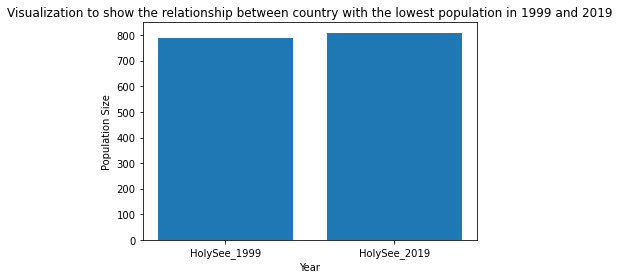

In [36]:
plt.bar(['HolySee_1999', 'HolySee_2019'], [min_population_1, min_population_2]) 
plt.title('Visualization to show the relationship between country with the lowest population in 1999 and 2019')
plt.xlabel ('Year')
plt.ylabel('Population Size');

In [37]:
# Percentage rise of minimum population in 1999 and 2019
difference= min_population_2- min_population_1
percentage_rise= (difference/min_population_1)*100
print (f' Holy see which is the country with the minimum population size  increased by {(percentage_rise):.2f}% in the year 2019'  )

 Holy see which is the country with the minimum population size  increased by 2.41% in the year 2019


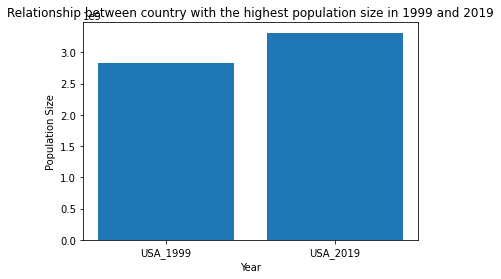

In [38]:
plt.bar(['USA_1999', 'USA_2019'], [max_population_1, max_population_2], width= 0.8) 
plt.title('Relationship between country with the highest population size in 1999 and 2019')
plt.xlabel ('Year')
plt.ylabel('Population Size');

In [39]:
# Percentage rise of maximum population in 1999 and 2019
difference= max_population_2- max_population_1
percentage_rise= (difference/max_population_1)*100
print (f' USA which is the country with the maximum population size increased by {(percentage_rise):.2f}% in the year 2019'  )

 USA which is the country with the maximum population size increased by 17.37% in the year 2019


# Summary of Population Analysis
* United State Of America has the highest Population size both in the year 2009 and 2019
* The Highest Population size in 1999 increased by 17.37% in the year 2019
* Holy see has the lowest population both in the year 1999 and 2019
* Holy see population size in 1999 increased by 2.41% in the year 2019

# Analysing Inflation Dataset
* Clean The data
* Remove all missing rows
* Replace all non ASCII characters to ASCII characters
* Convert all columns to Float Data types for easy analyzing
* Check for relationships between the columns 
* Communicate your findings

In [40]:
inflation.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,1.05,5.63,4.53,2.1,2.17,3.33,2.95,5.95,5.07,1.73,...,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,11.7,11.3,10.9,7.2,22.5,2.1,−2.16,...,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,5.5
Angola,418,106,197,93.9,33.4,42.4,17.1,4.31,19.4,−16.8,...,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,15.1
Albania,5.64,3.81,3.64,5.2,3.16,3.3,2.48,4.39,4.12,2.42,...,2.31,1.04,0.289,1.55,0.564,−0.632,1.45,1.36,0.477,−0.965
Andorra,28.7,3.08,3.24,3.18,3.04,3.4,3.46,3.21,2.27,0.132,...,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06


In [41]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1999    192 non-null    object
 1   2000    197 non-null    object
 2   2001    198 non-null    object
 3   2002    203 non-null    object
 4   2003    203 non-null    object
 5   2004    204 non-null    object
 6   2005    204 non-null    object
 7   2006    205 non-null    object
 8   2007    203 non-null    object
 9   2008    204 non-null    object
 10  2009    204 non-null    object
 11  2010    204 non-null    object
 12  2011    204 non-null    object
 13  2012    204 non-null    object
 14  2013    206 non-null    object
 15  2014    205 non-null    object
 16  2015    204 non-null    object
 17  2016    204 non-null    object
 18  2017    203 non-null    object
 19  2018    198 non-null    object
 20  2019    180 non-null    object
dtypes: object(21)
memory usage: 36.4+ KB


In [42]:
# Convert Object Datatype to Float, replace all non ASCII characters to ASCII characters
inflation_2= inflation.replace(r"[^\x00-\x7F]+", "-", regex= True)
inflation_2= inflation_2.astype(float)

In [43]:
inflation_2.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,1.05,5.63,4.53,2.10,2.17,3.33,2.95,5.95,5.07,1.730,...,3.110,0.789,3.290,2.000,0.440,-1.370,1.61,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,11.70,11.30,10.90,7.20,22.50,2.10,-2.160,...,16.600,7.300,4.820,0.567,2.450,-2.200,2.40,2.07,6.520,5.500
Angola,418.00,106.00,197.00,93.90,33.40,42.40,17.10,4.31,19.40,-16.800,...,31.800,7.260,2.840,3.560,-3.520,21.800,22.60,29.10,28.100,15.100
Albania,5.64,3.81,3.64,5.20,3.16,3.30,2.48,4.39,4.12,2.420,...,2.310,1.040,0.289,1.550,0.564,-0.632,1.45,1.36,0.477,-0.965
Andorra,28.70,3.08,3.24,3.18,3.04,3.40,3.46,3.21,2.27,0.132,...,0.197,0.175,0.448,-0.084,0.661,0.348,1.14,1.01,1.370,1.060


In [44]:
inflation_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    192 non-null    float64
 1   2000    197 non-null    float64
 2   2001    198 non-null    float64
 3   2002    203 non-null    float64
 4   2003    203 non-null    float64
 5   2004    204 non-null    float64
 6   2005    204 non-null    float64
 7   2006    205 non-null    float64
 8   2007    203 non-null    float64
 9   2008    204 non-null    float64
 10  2009    204 non-null    float64
 11  2010    204 non-null    float64
 12  2011    204 non-null    float64
 13  2012    204 non-null    float64
 14  2013    206 non-null    float64
 15  2014    205 non-null    float64
 16  2015    204 non-null    float64
 17  2016    204 non-null    float64
 18  2017    203 non-null    float64
 19  2018    198 non-null    float64
 20  2019    180 non-null    float64
dtypes: float64(21)
memory usage: 36.4+ 

In [45]:
# Drop all missing data
inflation_2.dropna(inplace= True)

In [46]:
inflation_2.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,29.565241,8.462171,7.781159,6.324175,7.552104,8.200677,9.435947,6.928759,9.739364,3.277504,...,7.817045,5.243213,3.845928,3.573067,2.684615,3.604046,5.470644,5.446839,5.954814,7.310469
std,204.102682,16.408422,18.922766,9.670270,9.738299,8.684602,17.281747,5.353072,7.319135,12.565882,...,8.266167,7.407848,6.433933,5.959206,7.848265,6.286108,7.381751,8.569805,27.424747,48.222917
min,-9.380000,-19.100000,-5.230000,-7.590000,-6.330000,-2.760000,-2.270000,-6.690000,-1.390000,-27.600000,...,-1.620000,-2.940000,-6.670000,-17.300000,-30.200000,-11.100000,-3.200000,-2.890000,-3.420000,-29.000000
25%,2.037500,1.870000,1.492500,1.655000,2.462500,2.577500,2.820000,3.132500,4.015000,0.173750,...,2.435000,1.485000,1.030000,0.660750,0.575000,0.662250,1.527500,1.710000,0.978000,0.065200
50%,5.205000,4.070000,3.495000,3.925000,5.690000,5.875000,5.845000,5.855000,8.130000,2.430000,...,5.650000,3.580000,2.525000,2.300000,2.275000,1.860000,3.565000,2.875000,2.345000,1.755000
75%,12.375000,8.192500,6.700000,8.397500,10.100000,11.075000,10.575000,8.887500,13.075000,6.175000,...,10.375000,7.167500,4.945000,5.277500,4.925000,4.697500,6.317500,5.550000,4.197500,4.892500
max,2630.000000,106.000000,197.000000,93.900000,94.200000,59.300000,175.000000,27.200000,35.000000,95.400000,...,71.000000,75.300000,54.000000,40.300000,42.500000,41.100000,58.200000,61.300000,350.000000,610.000000


In [47]:
min_inflation_1999= inflation_2[inflation_2['1999']== min(inflation_2['1999'])]
min_inflation_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Malta,-9.38,4.42,2.73,1.87,2.11,1.94,2.16,2.28,3.23,2.02,...,1.12,2.15,2.28,2.34,4.22,1.76,2.22,2.26,2.31,1.45


In [48]:
max_inflation_1999= inflation_2[inflation_2['1999']== max(inflation_2['1999'])]
max_inflation_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
"Congo, Dem. Rep.",2630.0,73.1,31.7,13.4,6.37,29.9,13.3,20.3,20.5,32.7,...,13.8,5.94,2.77,0.994,-1.16,4.35,43.1,29.0,4.7,10.3


In [49]:
min_inflation_2019= inflation_2[inflation_2['2019']== inflation_2['2019'].min()]
min_inflation_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Libya,13.3,7.18,27.2,14.4,22.6,28.6,9.46,11.0,21.8,-25.3,...,18.3,8.98,-6.67,-17.3,-19.4,-2.56,14.4,18.1,-1.1,-29.0


In [50]:
max_inflation_2019= inflation_2[inflation_2['2019']== inflation_2['2019'].max()]
max_inflation_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,0.628,-0.131,2.71,8.8,7.61,5.14,-2.02,0.895,1.35,95.4,...,2.55,4.03,9.37,-0.252,0.608,2.16,10.8,61.3,350.0,610.0


In [51]:
min_inflation_2019= inflation_2[inflation_2['2019'] == inflation_2['2019'].min()]
min_inflation_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Libya,13.3,7.18,27.2,14.4,22.6,28.6,9.46,11.0,21.8,-25.3,...,18.3,8.98,-6.67,-17.3,-19.4,-2.56,14.4,18.1,-1.1,-29.0


# Visualizing Inflation Dataset to understand the relationship between minimum inflation and maximum inflation in different years

In [52]:
min_inflation_1= inflation_2['1999'].min()
min_inflation_2= inflation_2['2019'].min()
max_inflation_1= inflation_2['1999'].max()
max_inflation_2= inflation_2['2019'].max()

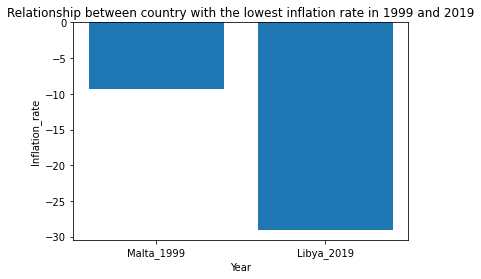

In [53]:
plt.bar(['Malta_1999', 'Libya_2019'], [min_inflation_1, min_inflation_2]) 
#plt.(['min_1999', 'min_2019'], [max_inflation_1, max_inflation_2]) 
plt.title('Relationship between country with the lowest inflation rate in 1999 and 2019')
plt.xlabel ('Year')
plt.ylabel('Inflation_rate');

In [54]:
# The minimum inflation rate in 1999 and 2019 is on a downward trend
difference= min_inflation_2- min_inflation_1
percentage_rise= (difference/min_inflation_1)*100
print (f' The minimum inflation rate in the year 1999 decreased by {(percentage_rise):.2f}% in the year 2019'  )

 The minimum inflation rate in the year 1999 decreased by 209.17% in the year 2019


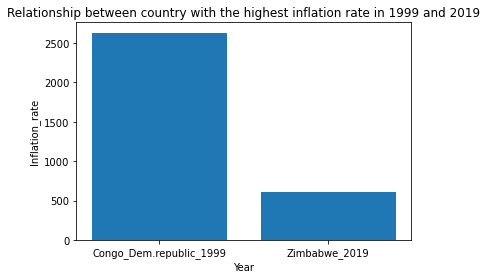

In [55]:
plt.bar(['Congo_Dem.republic_1999', 'Zimbabwe_2019'], [max_inflation_1, max_inflation_2]) 
plt.title('Relationship between country with the highest inflation rate in 1999 and 2019')
plt.xlabel ('Year')
plt.ylabel('Inflation_rate');

In [56]:
# The maximum inflation rate in 1999 and 2019 is on a downward trend
difference= max_inflation_1- max_inflation_2
percentage_rise= (difference/max_inflation_1)*100
print (f' The maximum inflation rate in the year 1999 decreased by {(percentage_rise):.2f}% in the year 2019'  )

 The maximum inflation rate in the year 1999 decreased by 76.81% in the year 2019


# Summary of the Inflation Analysis
* The minimum Inflation Rate in 1999 decreased by 209.17% in the year 2019
* The maximum Inflation Rate in 1999 decreased by 79.81% in the year 2019


 This shows how much Economic rate of all the in the data set countries has improved over the years

# Exploring Investment Data Set
* Clean The data
* Remove missing rows
* Convert all columns to Float Data types for easy analyzing
* Check for relationships between the columns 
* Communicate your findings

In [57]:
investment.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,25.5,23.7,26.9,29.2,28.8,33.6,35.2,32.5,33.3,30.3,...,28.5,26.6,23.8,23.1,21.5,20.6,20.6,21.6,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,30.5,30.5,30.5,30.5,30.9,27.6,23.3,25.7,30.8,42.8,...,26.4,26.7,26.1,27.5,34.2,27.2,24.1,21.4,19.8,22.8
Albania,30.8,35.0,35.3,33.9,34.2,36.9,35.7,34.5,35.8,34.6,...,31.4,28.3,28.1,25.7,25.8,25.2,25.1,24.1,NaN,NaN
United Arab Emirates,NaN,22.5,22.5,22.1,20.0,20.2,19.3,25.2,25.1,31.6,...,23.2,21.9,19.3,22.2,25.6,26.0,25.3,23.5,23.8,NaN


In [58]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    166 non-null    float64
 1   2000    167 non-null    float64
 2   2001    168 non-null    float64
 3   2002    169 non-null    float64
 4   2003    169 non-null    float64
 5   2004    170 non-null    float64
 6   2005    171 non-null    float64
 7   2006    173 non-null    float64
 8   2007    175 non-null    float64
 9   2008    174 non-null    float64
 10  2009    176 non-null    float64
 11  2010    176 non-null    float64
 12  2011    175 non-null    float64
 13  2012    174 non-null    float64
 14  2013    175 non-null    float64
 15  2014    176 non-null    object 
 16  2015    175 non-null    float64
 17  2016    174 non-null    float64
 18  2017    174 non-null    float64
 19  2018    163 non-null    float64
 20  2019    130 non-null    float64
dtypes: float64(20), object(1)
memory us

In [59]:
# there is only one column that is not in float dataset, so we will convert the object datatype into float datatype
for label, content in investment.items():
    if not pd.api.types.is_numeric_dtype(content):
        investment[label]= content.replace(r"[^\x00-\x7F]+", "-", regex= True)
        investment[label]= investment[label].astype(float)

In [60]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Aruba to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    166 non-null    float64
 1   2000    167 non-null    float64
 2   2001    168 non-null    float64
 3   2002    169 non-null    float64
 4   2003    169 non-null    float64
 5   2004    170 non-null    float64
 6   2005    171 non-null    float64
 7   2006    173 non-null    float64
 8   2007    175 non-null    float64
 9   2008    174 non-null    float64
 10  2009    176 non-null    float64
 11  2010    176 non-null    float64
 12  2011    175 non-null    float64
 13  2012    174 non-null    float64
 14  2013    175 non-null    float64
 15  2014    176 non-null    float64
 16  2015    175 non-null    float64
 17  2016    174 non-null    float64
 18  2017    174 non-null    float64
 19  2018    163 non-null    float64
 20  2019    130 non-null    float64
dtypes: float64(21)
memory usage: 32.3+ 

In [61]:
investment.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Aruba,25.5,23.7,26.9,29.2,28.8,33.6,35.2,32.5,33.3,30.3,...,28.5,26.6,23.8,23.1,21.5,20.6,20.6,21.6,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,30.5,30.5,30.5,30.5,30.9,27.6,23.3,25.7,30.8,42.8,...,26.4,26.7,26.1,27.5,34.2,27.2,24.1,21.4,19.8,22.8
Albania,30.8,35.0,35.3,33.9,34.2,36.9,35.7,34.5,35.8,34.6,...,31.4,28.3,28.1,25.7,25.8,25.2,25.1,24.1,NaN,NaN
United Arab Emirates,NaN,22.5,22.5,22.1,20.0,20.2,19.3,25.2,25.1,31.6,...,23.2,21.9,19.3,22.2,25.6,26.0,25.3,23.5,23.8,NaN


In [62]:
# lets view if there is any missing data
investment.isna().sum()

1999    22
2000    21
2001    20
2002    19
2003    19
2004    18
2005    17
2006    15
2007    13
2008    14
2009    12
2010    12
2011    13
2012    14
2013    13
2014    12
2015    13
2016    14
2017    14
2018    25
2019    58
dtype: int64

In [63]:
# Now lets drop all missing data
investment.dropna(inplace= True)

In [64]:
investment.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,...,125.00000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000
mean,21.483520,21.556240,21.385920,22.044880,22.878720,23.497920,24.263920,25.608720,26.24008,23.219120,...,24.22504,23.976000,23.814800,23.760320,24.272720,23.84896,23.620800,23.920560,24.146400,22.956320
std,6.503338,6.001869,7.042935,7.080528,7.130474,6.868932,6.641374,7.836245,7.73220,7.777686,...,6.85511,7.514592,7.500867,7.162567,8.490465,8.35368,6.634676,6.983195,7.854406,8.067561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,9.93000,6.700000,7.220000,8.940000,8.090000,7.82000,7.790000,9.970000,12.200000,5.790000
25%,18.500000,18.300000,18.400000,18.800000,19.700000,19.800000,20.800000,21.200000,21.80000,18.900000,...,19.90000,19.400000,19.300000,19.500000,19.800000,19.70000,19.600000,19.400000,18.900000,17.900000
50%,22.200000,22.200000,21.200000,21.300000,22.700000,22.600000,23.500000,24.600000,25.90000,21.400000,...,23.90000,23.300000,22.500000,22.800000,23.300000,22.70000,22.800000,22.700000,22.800000,22.800000
75%,25.900000,25.200000,24.700000,25.300000,26.200000,27.200000,28.400000,29.200000,30.30000,26.400000,...,26.90000,27.000000,27.500000,27.000000,27.500000,26.40000,27.300000,26.800000,26.400000,26.200000
max,35.200000,40.300000,60.200000,53.200000,58.000000,48.900000,42.200000,61.100000,47.90000,54.300000,...,58.20000,55.900000,53.300000,53.600000,79.400000,74.00000,48.500000,47.300000,54.700000,55.800000


In [65]:
# There are 125 Rows and 21 columns in this dataset
min_investment_1999= investment[investment['1999']== investment['1999'].min()]
min_investment_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.1,37.1,34.1,38.0,40.7,37.3,38.4,34.7,35.3,30.8


In [66]:
max_investment_1999= investment[investment['1999']== investment['1999'].max()]
max_investment_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Singapore,35.2,27.6,25.1,17.2,22.9,21.5,22.4,23.1,30.2,27.4,...,26.7,29.3,30.0,29.4,25.4,26.5,27.3,25.0,24.7,22.6


In [67]:
min_investment_2019= investment[investment['2019']== investment['2019'].min()]
min_investment_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Sudan,24.9,24.5,26.4,26.7,29.3,28.1,28.9,27.6,24.6,24.5,...,26.7,20.0,17.8,14.8,13.0,9.83,11.4,9.97,14.3,5.79


In [68]:
max_investment_2019= investment[investment['2019']== investment['2019'].max()]
max_investment_2019

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,29.0,20.5,22.1,23.2,23.5,26.9,36.2,37.4,37.4,37.7,...,20.7,22.1,23.7,25.0,23.9,27.2,32.6,37.0,42.5,55.8


In [69]:
min_investment_1= investment['1999'].min()
min_investment_2= investment['2019'].min()
max_investment_1= investment['1999'].max()
max_investment_2= investment['2019'].max()

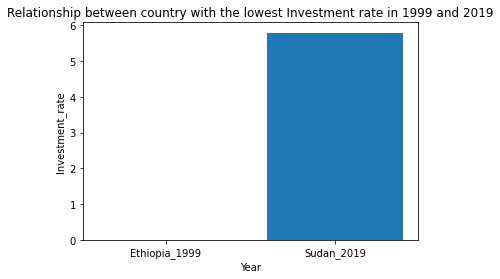

In [70]:
plt.bar(['Ethiopia_1999', 'Sudan_2019'], [min_investment_1, min_investment_2]) 
plt.title('Relationship between country with the lowest Investment rate in 1999 and 2019')
plt.xlabel ('Year')
plt.ylabel('Investment_rate');

In [71]:
# The minimum inflation rate in 1999 and 2019 is on a upward trend
difference= min_investment_2- min_investment_1
percentage_rise= (difference)*100
print (f' The minimum investment rate in the year 1999 increased by {(percentage_rise):.2f}% in the year 2019'  )

 The minimum investment rate in the year 1999 increased by 579.00% in the year 2019


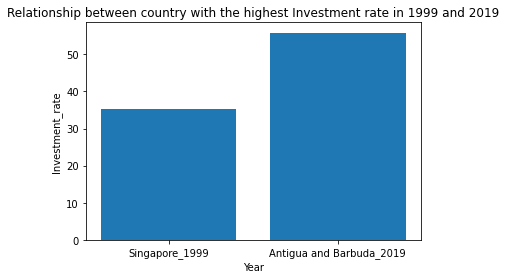

In [72]:
plt.bar(['Singapore_1999', 'Antigua and Barbuda_2019'], [max_investment_1, max_investment_2]) 
plt.title('Relationship between country with the highest Investment rate in 1999 and 2019')
plt.xlabel ('Year')
plt.ylabel('Investment_rate');

In [73]:
# The maximum inflation rate in 1999 and 2019 is on a upward trend
difference= max_investment_2- max_investment_1
percentage_rise= (difference/ max_investment_1)*100
print (f' The maximum investment rate in the year 1999 increased by {(percentage_rise):.2f}% in the year 2019'  )

 The maximum investment rate in the year 1999 increased by 58.52% in the year 2019


# Summary of the Investment Analysis
* The minimum Inflation Rate in 1999 increased by 579.00% in the year 2019
* The maximum Inflation Rate in 1999 increased by 58.52% in the year 2019


 This shows how much Economic rate of all the in the data set countries has improved over the years

# Exploring Tax Revenue Data Set
* Clean The data
* Remove all missing values
* Check for relationships between the columns
* Communicate your findings

In [74]:
tax_revenue.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,6.97,5.28,6.09,8.48,...,8.920,7.710,7.12,6.880,7.5900,9.5000,9.9000,NaN,NaN,NaN
Angola,28.70,29.20,15.50,17.2,18.1,17.1,23.40,21.50,25.70,18.40,...,16.100,14.800,14.20,13.500,11.0000,9.7300,9.2200,9.6400,9.380,NaN
Albania,NaN,NaN,16.50,17.2,18.0,NaN,NaN,NaN,NaN,NaN,...,18.000,17.500,16.50,18.300,18.5000,17.6000,18.9000,18.6000,18.300,NaN
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.321,0.364,0.37,0.356,0.0577,0.0435,0.0665,0.0593,0.965,NaN
Argentina,9.62,9.32,9.82,12.5,13.1,13.1,12.90,12.40,13.30,12.40,...,12.700,13.000,12.50,12.600,12.3000,12.1000,10.9000,10.1000,10.600,NaN


In [75]:
tax_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1999    85 non-null     float64
 1   2000    91 non-null     float64
 2   2001    96 non-null     float64
 3   2002    100 non-null    float64
 4   2003    102 non-null    float64
 5   2004    102 non-null    float64
 6   2005    105 non-null    float64
 7   2006    105 non-null    float64
 8   2007    113 non-null    float64
 9   2008    118 non-null    float64
 10  2009    122 non-null    float64
 11  2010    127 non-null    float64
 12  2011    131 non-null    float64
 13  2012    128 non-null    float64
 14  2013    135 non-null    float64
 15  2014    138 non-null    float64
 16  2015    136 non-null    float64
 17  2016    136 non-null    float64
 18  2017    129 non-null    float64
 19  2018    116 non-null    float64
 20  2019    3 non-null      float64
dtypes: float64(21)
memory usage: 

In [76]:
# drop 2019 column because it contains only 3 non null value data
tax_revenue.drop('2019', axis= 1, inplace= True)

In [77]:
tax_revenue.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,6.97,5.28,6.09,8.48,9.17,8.920,7.710,7.12,6.880,7.5900,9.5000,9.9000,NaN,NaN
Angola,28.70,29.20,15.50,17.2,18.1,17.1,23.40,21.50,25.70,18.40,16.60,16.100,14.800,14.20,13.500,11.0000,9.7300,9.2200,9.6400,9.380
Albania,NaN,NaN,16.50,17.2,18.0,NaN,NaN,NaN,NaN,NaN,NaN,18.000,17.500,16.50,18.300,18.5000,17.6000,18.9000,18.6000,18.300
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.321,0.364,0.37,0.356,0.0577,0.0435,0.0665,0.0593,0.965
Argentina,9.62,9.32,9.82,12.5,13.1,13.1,12.90,12.40,13.30,12.40,12.90,12.700,13.000,12.50,12.600,12.3000,12.1000,10.9000,10.1000,10.600


In [78]:
tax_revenue.dropna(inplace= True)

In [79]:
tax_revenue.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,
Angola,28.70,29.20,15.50,17.2,18.1,17.1,23.4,21.5,25.7,18.4,16.6,16.1,14.8,14.2,13.5,11.0,9.73,9.22,9.64,9.38
Argentina,9.62,9.32,9.82,12.5,13.1,13.1,12.9,12.4,13.3,12.4,12.9,12.7,13.0,12.5,12.6,12.3,12.10,10.90,10.10,10.60
Australia,23.10,24.90,23.60,24.4,24.3,24.8,24.6,24.1,24.3,22.0,20.5,20.4,21.1,22.0,21.9,21.9,22.20,22.00,23.10,23.30
Austria,26.20,28.00,27.00,26.6,26.3,25.5,25.1,25.4,26.1,25.2,25.3,25.4,25.9,26.4,26.4,26.8,25.40,25.40,25.40,25.60
Belgium,27.30,26.80,25.70,25.1,25.5,25.5,25.3,24.8,25.3,23.8,24.5,24.9,25.8,26.2,26.1,24.4,22.80,23.40,24.00,22.70


In [80]:
tax_revenue.shape

(66, 20)

In [81]:
tax_revenue.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,18.963788,18.773939,18.366515,18.692576,19.031061,19.693333,20.312576,20.795152,20.106667,18.622727,18.404394,18.739545,19.104394,19.152576,19.248333,18.909697,19.215303,19.187121,19.162121,19.240303
std,7.401048,7.521921,7.505966,7.408773,7.508476,7.850744,8.061964,8.747530,6.833189,6.053404,5.735813,5.894124,6.377423,6.311409,6.507238,6.102691,6.195030,5.948940,5.943527,5.952132
min,7.650000,7.350000,7.620000,7.030000,8.970000,9.080000,8.780000,9.010000,9.540000,7.920000,8.600000,9.240000,9.090000,9.170000,8.990000,8.990000,9.180000,9.220000,9.560000,9.380000
25%,13.175000,13.325000,13.200000,13.325000,13.325000,13.800000,14.525000,14.900000,14.825000,13.625000,13.475000,14.500000,14.725000,13.725000,13.700000,13.650000,13.850000,14.550000,14.350000,14.525000
50%,17.500000,17.200000,16.950000,17.750000,18.250000,18.800000,19.900000,20.250000,19.800000,18.250000,17.700000,18.050000,18.450000,17.800000,18.050000,18.500000,18.350000,18.300000,18.600000,18.950000
75%,23.375000,23.400000,22.600000,22.950000,23.700000,24.100000,24.150000,24.700000,24.175000,22.850000,22.375000,22.725000,23.125000,23.125000,23.500000,23.275000,23.250000,23.575000,23.325000,23.250000
max,48.600000,51.400000,53.700000,54.100000,55.000000,58.800000,60.000000,62.500000,46.000000,40.000000,34.400000,37.400000,38.100000,36.400000,36.500000,33.900000,37.600000,33.400000,32.300000,34.300000


In [82]:
min_tax_revenue_1999= tax_revenue[tax_revenue['1999'] == min(tax_revenue['1999'])]
min_tax_revenue_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,
Georgia,7.65,7.35,7.62,7.03,9.93,12.1,15.4,17.7,23.8,23.1,21.0,22.8,23.2,22.0,22.0,22.2,22.3,22.1,21.7,19.6


In [83]:
min_tax_revenue_2018= tax_revenue[tax_revenue['2018'] == min(tax_revenue['2018'])]
min_tax_revenue_2018

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,
Angola,28.7,29.2,15.5,17.2,18.1,17.1,23.4,21.5,25.7,18.4,16.6,16.1,14.8,14.2,13.5,11.0,9.73,9.22,9.64,9.38


In [84]:
max_tax_revenue_1999= tax_revenue[tax_revenue['1999'] == max(tax_revenue['1999'])]
max_tax_revenue_1999

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,
Malta,48.6,51.4,53.7,54.1,55.0,58.8,60.0,62.5,25.8,26.0,25.3,25.8,25.7,25.7,26.0,24.3,25.1,25.6,25.8,25.5


In [85]:
max_tax_revenue_2018= tax_revenue[tax_revenue['2018'] == max(tax_revenue['2018'])]
max_tax_revenue_2018

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,
Denmark,31.6,30.2,30.1,30.1,31.3,33.1,31.9,35.1,33.4,33.2,32.7,32.8,33.4,33.8,36.5,33.9,33.3,33.4,32.2,34.3


In [86]:
min_tax_revenue_1= tax_revenue['1999'].min()
min_tax_revenue_2= tax_revenue['2018'].min()
max_tax_revenue_1= tax_revenue['1999'].max()
max_tax_revenue_2= tax_revenue['2018'].max()

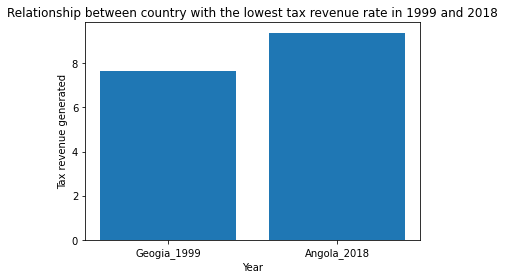

In [87]:
plt.bar (['Geogia_1999', 'Angola_2018'], [min_tax_revenue_1, min_tax_revenue_2]) 
plt.title('Relationship between country with the lowest tax revenue rate in 1999 and 2018')
plt.xlabel ('Year')
plt.ylabel('Tax revenue generated');

In [88]:
# The minimum tax rate in 1999 and 2019 is on an upward trend
difference= min_tax_revenue_2- min_tax_revenue_1
percentage_rise= (difference/ min_tax_revenue_1)*100
print (f' The minimum tax revenue rate in the year 1999 increased by {(percentage_rise):.2f}% in the year 2019'  )

 The minimum tax revenue rate in the year 1999 increased by 22.61% in the year 2019


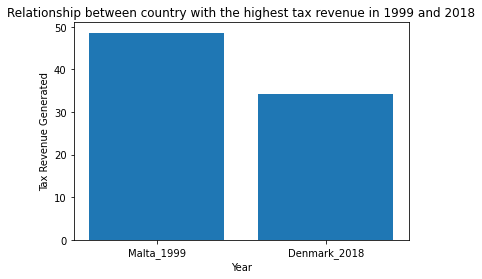

In [89]:
plt.bar(['Malta_1999', 'Denmark_2018'], [max_tax_revenue_1, max_tax_revenue_2]) 
plt.title('Relationship between country with the highest tax revenue in 1999 and 2018')
plt.xlabel ('Year')
plt.ylabel('Tax Revenue Generated');

In [90]:
# The minimum tax rate in 1999 and 2019 is on a downward trend
difference= max_tax_revenue_2- max_tax_revenue_1
percentage_rise= (difference/ min_tax_revenue_1)*100
print (f' The minimum tax revenue rate in the year 1999 increased by {(percentage_rise):.2f}% in the year 2019'  )

 The minimum tax revenue rate in the year 1999 increased by -186.93% in the year 2019


# Summary of the Tax Revenue Analysis
* The minimum tax revenue in 1999 increased by 22.61% in the year 2018
* The maximum tax revenue in 1999 decreased by 186.93% in the year 2018


 This shows that total tax revenue of most countries decreased over the years

# SUMMARY 
* Malta has the lowest inflation rate in 1999 and the maximum tax revenue in 1999
* 

# Lets correlate the data
* Change the column names
* Merge the data

In [91]:
population_2= population_2.rename(columns= lambda x: x + '_pop')
population_2.head()

,1999_pop,2000_pop,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,...,2010_pop,2011_pop,2012_pop,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2019_pop
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,20810000.0,21610000.0,22610000.0,23710000.0,24710000.0,25710000.0,26410000.0,27110000.0,27710000.0,28410000.0,...,30110000.0,31210000.0,32310000.0,33410000.0,34410000.0,35410000.0,36310000.0,37210000.0,381000000.0,38910000.0
Angola,16410000.0,16910000.0,17510000.0,18110000.0,18810000.0,19410000.0,20110000.0,20910000.0,21710000.0,22510000.0,...,24210000.0,25110000.0,261000000.0,26910000.0,27910000.0,28810000.0,29810000.0,30810000.0,31810000.0,32910000.0
Albania,3131000.0,3131000.0,3131000.0,3121000.0,3110000.0,3091000.0,3061000.0,3031000.0,31000000.0,2971000.0,...,2931000.0,2911000.0,2910000.0,2910000.0,2891000.0,2891000.0,2881000.0,2881000.0,2881000.0,2881000.0
Andorra,65410.0,67310.0,701000.0,73210.0,76310.0,78910.0,811000.0,82710.0,83910.0,84510.0,...,83710.0,82410.0,80810.0,79210.0,781000.0,77310.0,771000.0,771000.0,77110.0,77310.0
United Arab Emirates,3131000.0,3310000.0,3481000.0,3711000.0,4071000.0,4591000.0,5310000.0,6171000.0,7091000.0,7921000.0,...,8951000.0,9141000.0,9210000.0,9211000.0,9261000.0,9361000.0,9491000.0,9631000.0,9771000.0,9891000.0


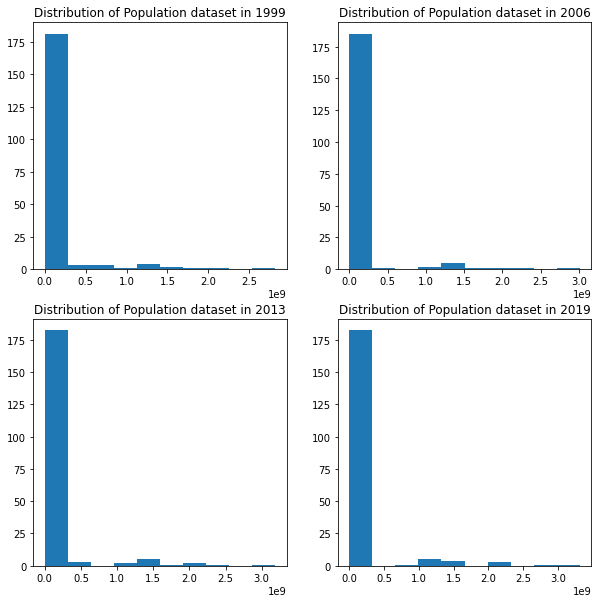

In [92]:
# Distribution of Population dataset
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows= 2, ncols= 2, figsize= (10,10))
ax1.hist(population_2['1999_pop'])
ax2.hist(population_2['2006_pop'])
ax3.hist(population_2['2013_pop'])
ax4.hist(population_2['2019_pop'])
ax1.set(title= 'Distribution of Population dataset in 1999' )
ax2.set(title= 'Distribution of Population dataset in 2006' )
ax3.set(title= 'Distribution of Population dataset in 2013' )
ax4.set(title= 'Distribution of Population dataset in 2019' );

# SUMMARY
*  Most Countries have less than Average of total population and there are lesser population size of people in 1999
*  Over 80% Countries have fewer population

In [93]:
inflation_2= inflation_2.rename(columns= lambda x: x+ '_inf')
inflation_2.head()

,1999_inf,2000_inf,2001_inf,2002_inf,2003_inf,2004_inf,2005_inf,2006_inf,2007_inf,2008_inf,...,2010_inf,2011_inf,2012_inf,2013_inf,2014_inf,2015_inf,2016_inf,2017_inf,2018_inf,2019_inf
country,,,,,,,,,,,,,,,,,,,,,
Angola,418.00,106.00,197.00,93.90,33.40,42.40,17.10,4.31,19.40,-16.800,...,31.800,7.260,2.840,3.560,-3.520,21.800,22.60,29.10,28.100,15.100
Albania,5.64,3.81,3.64,5.20,3.16,3.30,2.48,4.39,4.12,2.420,...,2.310,1.040,0.289,1.550,0.564,-0.632,1.45,1.36,0.477,-0.965
Andorra,28.70,3.08,3.24,3.18,3.04,3.40,3.46,3.21,2.27,0.132,...,0.197,0.175,0.448,-0.084,0.661,0.348,1.14,1.01,1.370,1.060
Argentina,1.04,-1.10,30.60,10.50,18.40,10.30,13.70,14.90,23.20,15.400,...,23.700,22.300,23.900,40.300,26.600,41.100,26.00,40.00,50.600,39.800
Armenia,-1.37,4.03,2.36,4.60,6.28,3.21,4.62,4.28,5.99,2.500,...,4.280,5.350,3.370,2.310,1.210,0.269,2.15,2.79,1.460,1.880


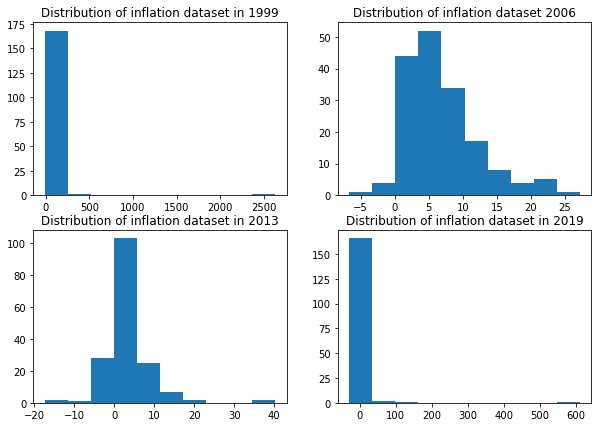

In [94]:
# Distribution of inflation dataset
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows= 2, ncols= 2, figsize= (10,7))
ax1.hist(inflation_2['1999_inf'])
ax2.hist(inflation_2['2006_inf'])
ax3.hist(inflation_2['2013_inf'])
ax4.hist(inflation_2['2019_inf'])
ax1.set(title= 'Distribution of inflation dataset in 1999' )
ax2.set(title= 'Distribution of inflation dataset 2006' )
ax3.set(title= 'Distribution of inflation dataset in 2013' )
ax4.set(title= 'Distribution of inflation dataset in 2019' );

# Summary
> **1999**
* No country have less than 0% inflation in 1999
* The data is skewed to the right with no outliers
* Maximum inflation rate is 2500

> **2006**
* The minimum inflation rate in 1999 fell from a ratio of 0 to -5 in 2006 
* The data is skewed to the right. 
* There are Ouliers in this dataset
* Maximum inflation rate is 25

> **2013**
* The minimum inflation rate in 2006 fell from a ratio of -5 to -18 in 2013.
* Maximum inflation rate is 40
* The data is skewed to the right. 
* There are Ouliers in this dataset

> **2019**
* The minimum inflation rate in 2019 rose to 13 in 2019. 
* There are outliers in this dataset 
* Maximum inflation rate is between 600-700

# Conclusion

Inflation Rate of most countries decreased significantly over the years especially in between 2006-2013. Then it rose in 2019. The ecomonic rate of 2013 significantly improved

In [95]:
investment= investment.rename(columns= lambda x:x + '_inv')
investment.head()

,1999_inv,2000_inv,2001_inv,2002_inv,2003_inv,2004_inv,2005_inv,2006_inv,2007_inv,2008_inv,...,2010_inv,2011_inv,2012_inv,2013_inv,2014_inv,2015_inv,2016_inv,2017_inv,2018_inv,2019_inv
country,,,,,,,,,,,,,,,,,,,,,
Angola,30.5,30.5,30.5,30.5,30.9,27.6,23.3,25.7,30.8,42.8,...,26.4,26.7,26.1,27.5,34.2,27.2,24.1,21.4,19.8,22.8
Argentina,17.5,15.6,10.9,14.1,17.6,18.9,18.7,20.1,19.6,16.1,...,18.4,16.5,17.3,17.3,17.1,17.7,18.2,16.0,14.6,13.8
Armenia,21.9,22.9,25.4,28.3,29.1,35.8,42.2,44.4,47.9,41.1,...,31.9,24.7,22.2,21.3,20.7,18.0,18.4,22.4,17.4,17.2
Antigua and Barbuda,29.0,20.5,22.1,23.2,23.5,26.9,36.2,37.4,37.4,37.7,...,20.7,22.1,23.7,25.0,23.9,27.2,32.6,37.0,42.5,55.8
Australia,26.3,23.5,24.5,26.0,27.2,27.6,27.6,27.6,28.7,27.4,...,26.5,27.7,27.9,26.7,26.3,25.4,24.1,24.5,23.2,22.3


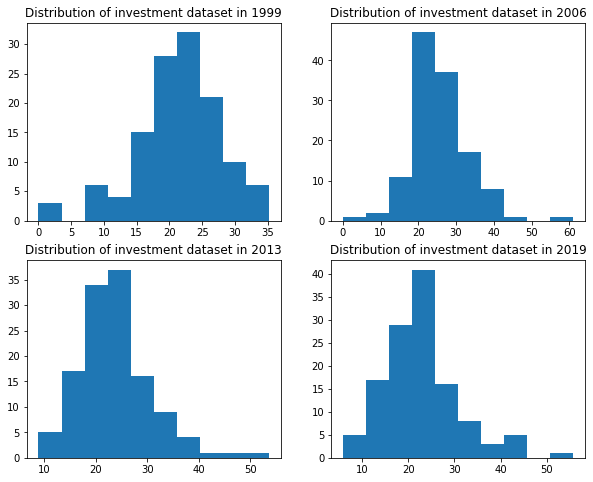

In [96]:
# Distribution of investment dataset
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows= 2, ncols= 2, figsize= (10,8))
ax1.hist(investment['1999_inv'])
ax2.hist(investment['2006_inv'])
ax3.hist(investment['2013_inv'])
ax4.hist(investment['2019_inv'])
ax1.set(title= 'Distribution of investment dataset in 1999' )
ax2.set(title= 'Distribution of investment dataset in 2006' )
ax3.set(title= 'Distribution of investment dataset in 2013' )
ax4.set(title= 'Distribution of investment dataset in 2019' );

# SUMMARY
> **1999**
* The maximum investment rate is 35 
* The data is skewed to the left

> **2006**
* The maximum investment rate increased to 60-70 
* The data is skewed to the right
* Their are outliers in this dataset

> **2013**
* the maximum investment rate decreased to 50-60
* The data is skewed to the left
* Their are outliers in this dataset

> **2019**
* the maximum investment rate decreased to 50-60
* The data is skewed to the left
* Their are outliers in this dataset

# Conclusion
Their is positive increase in the Investment rate of different countries over the years


In [97]:
tax_revenue= tax_revenue.rename(columns= lambda x: x +'_tax')
tax_revenue.head()

,1999_tax,2000_tax,2001_tax,2002_tax,2003_tax,2004_tax,2005_tax,2006_tax,2007_tax,2008_tax,2009_tax,2010_tax,2011_tax,2012_tax,2013_tax,2014_tax,2015_tax,2016_tax,2017_tax,2018_tax
country,,,,,,,,,,,,,,,,,,,,
Angola,28.70,29.20,15.50,17.2,18.1,17.1,23.4,21.5,25.7,18.4,16.6,16.1,14.8,14.2,13.5,11.0,9.73,9.22,9.64,9.38
Argentina,9.62,9.32,9.82,12.5,13.1,13.1,12.9,12.4,13.3,12.4,12.9,12.7,13.0,12.5,12.6,12.3,12.10,10.90,10.10,10.60
Australia,23.10,24.90,23.60,24.4,24.3,24.8,24.6,24.1,24.3,22.0,20.5,20.4,21.1,22.0,21.9,21.9,22.20,22.00,23.10,23.30
Austria,26.20,28.00,27.00,26.6,26.3,25.5,25.1,25.4,26.1,25.2,25.3,25.4,25.9,26.4,26.4,26.8,25.40,25.40,25.40,25.60
Belgium,27.30,26.80,25.70,25.1,25.5,25.5,25.3,24.8,25.3,23.8,24.5,24.9,25.8,26.2,26.1,24.4,22.80,23.40,24.00,22.70


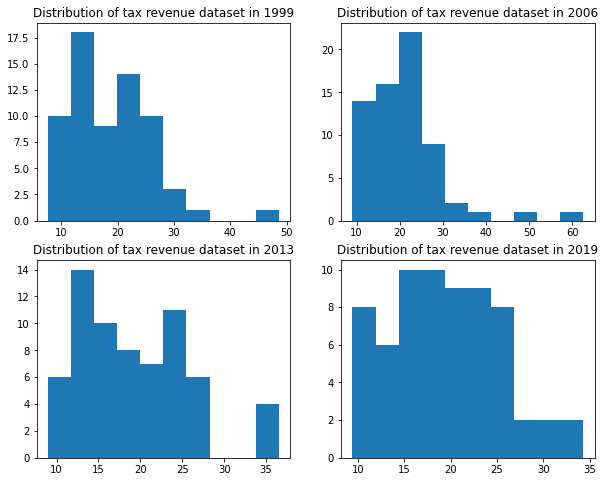

In [98]:
# Distribution of tax revenue dataset
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows= 2, ncols= 2, figsize= (10,8))
ax1.hist(tax_revenue['1999_tax'])
ax2.hist(tax_revenue['2006_tax'])
ax3.hist(tax_revenue['2013_tax'])
ax4.hist(tax_revenue['2018_tax'])
ax1.set(title= 'Distribution of tax revenue dataset in 1999' )
ax2.set(title= 'Distribution of tax revenue dataset in 2006' )
ax3.set(title= 'Distribution of tax revenue dataset in 2013' )
ax4.set(title= 'Distribution of tax revenue dataset in 2019' );

# Summary
> **1999**
* The maximum revenue is to 40-50 
* The data is skewed to the right
* Their are outliers in this dataset

> **2006**
* The maximum investment rate increased to 60-70 
* The data is skewed to the right
* Their are outliers in this dataset

> **2013**
* The maximum investment rate decreased to 35-40 
* The data is skewed to the right
* Their are outliers in this dataset

> **2018**
* The maximum investment rate increased to 30-35
* The data is skewed to the right
* Their are outliers in this dataset

 # Conclusion
    There is decrease in Tax Revenue being generated in different countries over the years

# Merge inflation and population Dataset and see if there is any relationship between them

In [99]:
merged_data_1= pd.merge(population_2, inflation_2, left_index= True, right_index= True)

In [100]:
merged_data_1.head()

,1999_pop,2000_pop,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,...,2010_inf,2011_inf,2012_inf,2013_inf,2014_inf,2015_inf,2016_inf,2017_inf,2018_inf,2019_inf
country,,,,,,,,,,,,,,,,,,,,,
Angola,16410000.0,16910000.0,17510000.0,18110000.0,18810000.0,19410000.0,20110000.0,20910000.0,21710000.0,22510000.0,...,31.800,7.260,2.840,3.560,-3.520,21.800,22.60,29.10,28.100,15.100
Albania,3131000.0,3131000.0,3131000.0,3121000.0,3110000.0,3091000.0,3061000.0,3031000.0,31000000.0,2971000.0,...,2.310,1.040,0.289,1.550,0.564,-0.632,1.45,1.36,0.477,-0.965
Andorra,65410.0,67310.0,701000.0,73210.0,76310.0,78910.0,811000.0,82710.0,83910.0,84510.0,...,0.197,0.175,0.448,-0.084,0.661,0.348,1.14,1.01,1.370,1.060
Argentina,36910000.0,37310000.0,37710000.0,38110000.0,38510000.0,38910000.0,39310000.0,39710000.0,40110000.0,40510000.0,...,23.700,22.300,23.900,40.300,26.600,41.100,26.00,40.00,50.600,39.800
Armenia,3071000.0,3051000.0,3031000.0,3021000.0,31000000.0,2981000.0,2961000.0,2931000.0,2911000.0,2891000.0,...,4.280,5.350,3.370,2.310,1.210,0.269,2.15,2.79,1.460,1.880


In [101]:
len(merged_data_1)

168

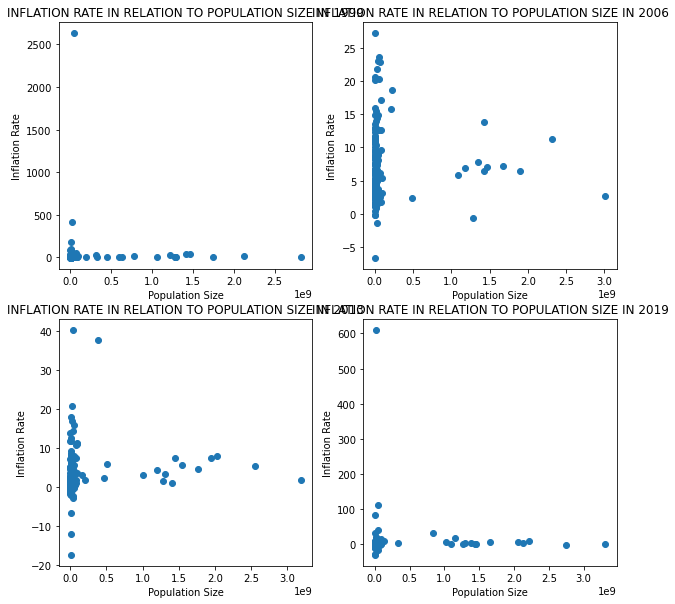

In [102]:
x_1= merged_data_1['1999_pop']
y_1= merged_data_1['1999_inf']
x_2= merged_data_1['2006_pop']
y_2= merged_data_1['2006_inf']
x_3= merged_data_1['2013_pop']
y_3= merged_data_1['2013_inf']
x_4= merged_data_1['2019_pop']
y_4= merged_data_1['2019_inf']

fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(nrows= 2, ncols=2, figsize= (10,10))
ax1.scatter(x_1, y_1)
ax2.scatter(x_2, y_2)
ax3.scatter(x_3, y_3)
ax4.scatter(x_4, y_4)

ax1.set(title= ('INFLATION RATE IN RELATION TO POPULATION SIZE IN 1999'), 
        xlabel=('Population Size'),
        ylabel= ('Inflation Rate'))

ax2.set(title= ('INFLATION RATE IN RELATION TO POPULATION SIZE IN 2006'), 
        xlabel=('Population Size'),
        ylabel= ('Inflation Rate'))

ax3.set(title= ('INFLATION RATE IN RELATION TO POPULATION SIZE IN 2013'), 
        xlabel=('Population Size'),
        ylabel= ('Inflation Rate'))

ax4.set(title= ('INFLATION RATE IN RELATION TO POPULATION SIZE IN 2019'), 
        xlabel=('Population Size'),
        ylabel= ('Inflation Rate'));


# Conclusion
* Countries with low Population size have high rate of inflation 

In [103]:
merged_data_2= pd.merge(population_2, tax_revenue, left_index= True, right_index= True)
merged_data_2.head()

,1999_pop,2000_pop,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,...,2009_tax,2010_tax,2011_tax,2012_tax,2013_tax,2014_tax,2015_tax,2016_tax,2017_tax,2018_tax
country,,,,,,,,,,,,,,,,,,,,,
Angola,16410000.0,16910000.0,17510000.0,18110000.0,18810000.0,19410000.0,20110000.0,20910000.0,21710000.0,22510000.0,...,16.6,16.1,14.8,14.2,13.5,11.0,9.73,9.22,9.64,9.38
Argentina,36910000.0,37310000.0,37710000.0,38110000.0,38510000.0,38910000.0,39310000.0,39710000.0,40110000.0,40510000.0,...,12.9,12.7,13.0,12.5,12.6,12.3,12.10,10.90,10.10,10.60
Australia,191000000.0,19210000.0,19410000.0,19610000.0,19910000.0,20210000.0,20510000.0,20910000.0,21310000.0,21810000.0,...,20.5,20.4,21.1,22.0,21.9,21.9,22.20,22.00,23.10,23.30
Austria,8071000.0,8110000.0,8131000.0,8181000.0,8221000.0,8251000.0,8291000.0,8311000.0,8341000.0,8371000.0,...,25.3,25.4,25.9,26.4,26.4,26.8,25.40,25.40,25.40,25.60
Belgium,10310000.0,10310000.0,10410000.0,10410000.0,10510000.0,10510000.0,10610000.0,10710000.0,10810000.0,10910000.0,...,24.5,24.9,25.8,26.2,26.1,24.4,22.80,23.40,24.00,22.70


In [104]:
len(merged_data_2)

65

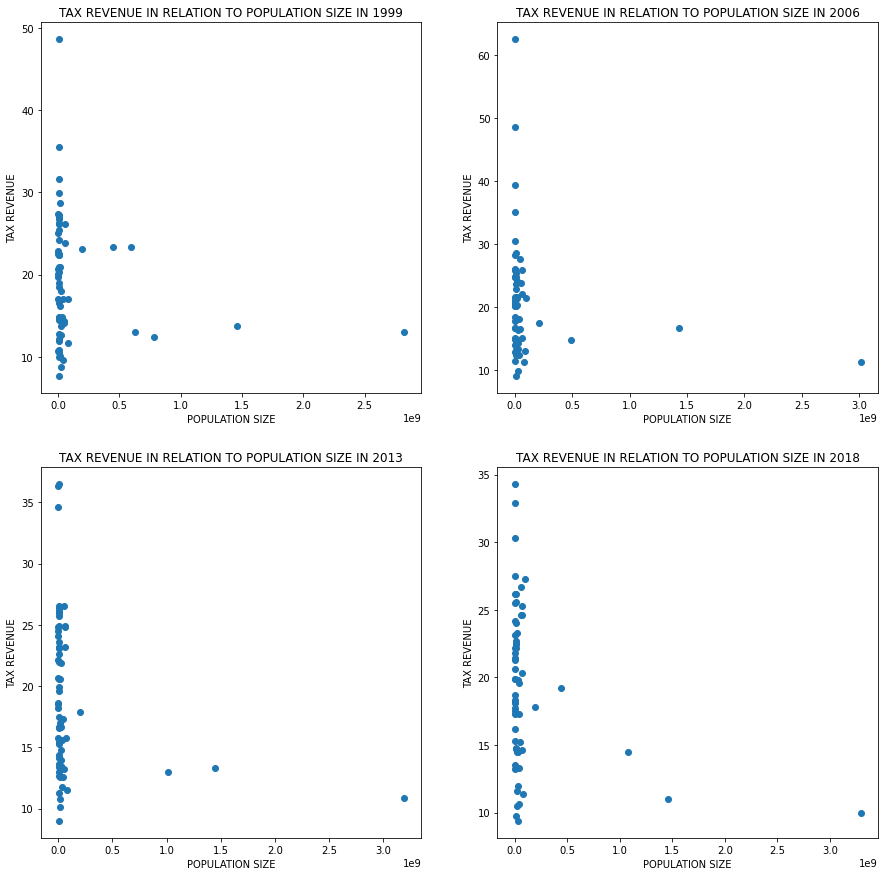

In [105]:
x_1= merged_data_2['1999_pop']
y_1= merged_data_2['1999_tax']
x_2= merged_data_2['2006_pop']
y_2= merged_data_2['2006_tax']
x_3= merged_data_2['2013_pop']
y_3= merged_data_2['2013_tax']
x_4= merged_data_2['2018_pop']
y_4= merged_data_2['2018_tax']

fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(nrows= 2, ncols=2, figsize= (15,15))
ax1.scatter(x_1, y_1)
ax2.scatter(x_2, y_2)
ax3.scatter(x_3, y_3)
ax4.scatter(x_4, y_4)

ax1.set(title= ('TAX REVENUE IN RELATION TO POPULATION SIZE IN 1999'), 
        xlabel=('POPULATION SIZE'),
        ylabel= ('TAX REVENUE'))

ax2.set(title= ('TAX REVENUE IN RELATION TO POPULATION SIZE IN 2006'), 
        xlabel=('POPULATION SIZE'),
        ylabel= ('TAX REVENUE'))

ax3.set(title= ('TAX REVENUE IN RELATION TO POPULATION SIZE IN 2013'), 
        xlabel=('POPULATION SIZE'),
        ylabel= ('TAX REVENUE'))

ax4.set(title= ('TAX REVENUE IN RELATION TO POPULATION SIZE IN 2018'), 
        xlabel=('POPULATION SIZE'),
        ylabel= ('TAX REVENUE'));


# Conclusion
* Countries with lower population generate more tax than countries with higher population size

In [106]:
merged_data_3= pd.merge(population_2, investment, left_index= True, right_index= True)
merged_data_3

,1999_pop,2000_pop,2001_pop,2002_pop,2003_pop,2004_pop,2005_pop,2006_pop,2007_pop,2008_pop,...,2010_inv,2011_inv,2012_inv,2013_inv,2014_inv,2015_inv,2016_inv,2017_inv,2018_inv,2019_inv
country,,,,,,,,,,,,,,,,,,,,,
Angola,1.641000e+07,1.691000e+07,1.751000e+07,1.811000e+07,1.881000e+07,1.941000e+07,2.011000e+07,2.091000e+07,2.171000e+07,2.251000e+07,...,26.4,26.7,26.1,27.5,34.2,27.2,24.1,21.4,19.8,22.8
Argentina,3.691000e+07,3.731000e+07,3.771000e+07,3.811000e+07,3.851000e+07,3.891000e+07,3.931000e+07,3.971000e+07,4.011000e+07,4.051000e+07,...,18.4,16.5,17.3,17.3,17.1,17.7,18.2,16.0,14.6,13.8
Armenia,3.071000e+06,3.051000e+06,3.031000e+06,3.021000e+06,3.100000e+07,2.981000e+06,2.961000e+06,2.931000e+06,2.911000e+06,2.891000e+06,...,31.9,24.7,22.2,21.3,20.7,18.0,18.4,22.4,17.4,17.2
Antigua and Barbuda,7.610000e+05,7.721000e+04,7.831000e+04,7.931000e+04,8.031000e+04,8.151000e+04,8.271000e+04,8.410000e+05,8.541000e+04,8.671000e+04,...,20.7,22.1,23.7,25.0,23.9,27.2,32.6,37.0,42.5,55.8
Australia,1.910000e+08,1.921000e+07,1.941000e+07,1.961000e+07,1.991000e+07,2.021000e+07,2.051000e+07,2.091000e+07,2.131000e+07,2.181000e+07,...,26.5,27.7,27.9,26.7,26.3,25.4,24.1,24.5,23.2,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,2.821000e+09,2.851000e+09,2.871000e+09,2.901000e+09,2.921000e+09,2.951000e+09,2.981000e+09,3.011000e+09,3.031000e+09,3.061000e+09,...,19.1,20.0,20.4,20.8,21.2,20.5,20.7,21.1,21.3,21.1
Uzbekistan,2.481000e+07,2.511000e+07,2.541000e+07,2.571000e+07,2.611000e+07,2.641000e+07,2.681000e+07,2.721000e+07,2.761000e+07,2.811000e+07,...,26.6,25.6,25.5,26.5,26.1,26.4,29.5,37.6,45.2,37.5
Vietnam,7.991000e+07,8.071000e+07,8.151000e+07,8.231000e+07,8.311000e+07,8.381000e+07,8.461000e+07,8.541000e+07,8.621000e+07,8.711000e+07,...,29.8,27.2,26.7,26.8,27.7,26.6,26.6,26.5,26.8,26.7


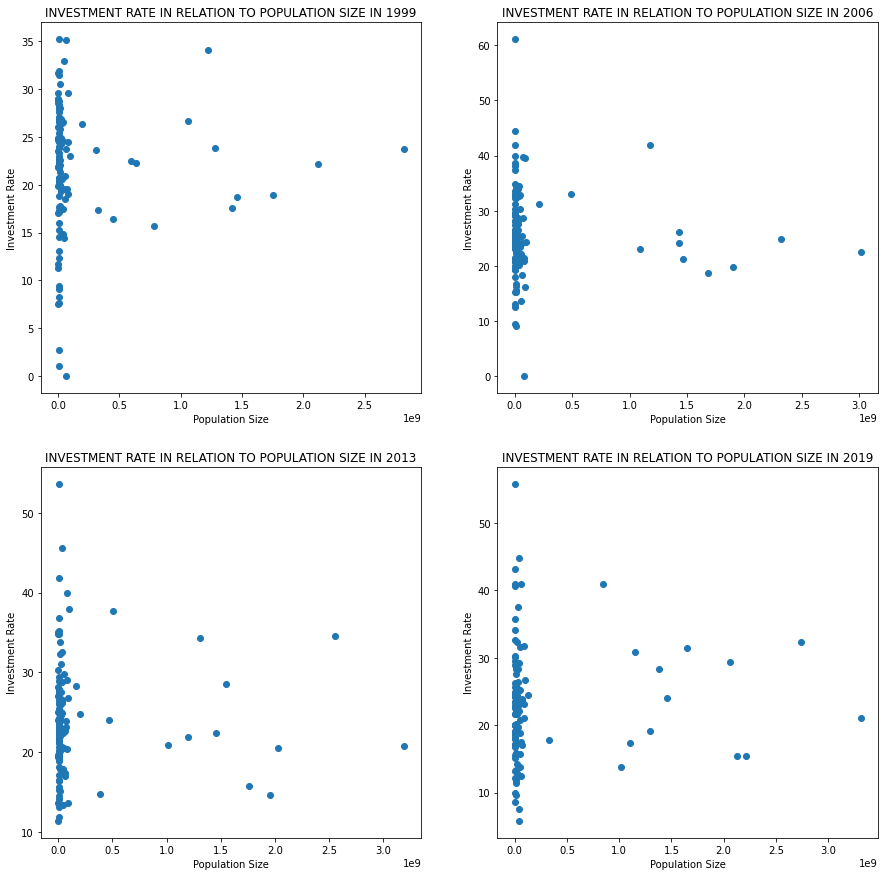

In [107]:
x_1= merged_data_3['1999_pop']
y_1= merged_data_3['1999_inv']
x_2= merged_data_3['2006_pop']
y_2= merged_data_3['2006_inv']
x_3= merged_data_3['2013_pop']
y_3= merged_data_3['2013_inv']
x_4= merged_data_3['2019_pop']
y_4= merged_data_3['2019_inv']

fig, ((ax1,ax2), (ax3,ax4))= plt.subplots(nrows= 2, ncols=2, figsize= (15,15))
ax1.scatter(x_1, y_1)
ax2.scatter(x_2, y_2)
ax3.scatter(x_3, y_3)
ax4.scatter(x_4, y_4)

ax1.set(title= ('INVESTMENT RATE IN RELATION TO POPULATION SIZE IN 1999'), 
        xlabel=('Population Size'),
        ylabel= ('Investment Rate'))

ax2.set(title= ('INVESTMENT RATE IN RELATION TO POPULATION SIZE IN 2006'), 
        xlabel=('Population Size'),
        ylabel= ('Investment Rate'))

ax3.set(title= ('INVESTMENT RATE IN RELATION TO POPULATION SIZE IN 2013'), 
        xlabel=('Population Size'),
        ylabel= ('Investment Rate'))

ax4.set(title= ('INVESTMENT RATE IN RELATION TO POPULATION SIZE IN 2019'), 
        xlabel=('Population Size'),
        ylabel= ('Investment Rate'));


# Conclusion
* Countries with higher Population size have more investments than country with lower population size

# General Conclusion
* Population Size of a country always affects economy rate of that country.
* Economic Rate of most countries increase over the year.